In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from ipywidgets import Video

from PIL import Image
from PIL.ExifTags import TAGS

## Loading video


In [ ]:
game = cv2.VideoCapture("./materials/short.mp4")
if game.isOpened():
    print("video loaded")
    
game_width = int(game.get(3))
game_height = int(game.get(4))

print(game_width, game_height)

game_fps = game.get(cv2.CAP_PROP_FPS)
print(game_fps)

In [3]:
temp_o_1 = cv2.imread("./materials/cow2.png", cv2.IMREAD_GRAYSCALE)
temp_o_1_width, temp_o_1_height = temp_o_1.shape[:2]


In [4]:
### matchTemplate (zła rotacja)

# template = temp_o_1
# template_width = temp_o_1_width
# template_height = temp_o_1_height

# output = cv2.VideoWriter(
#     "out1.avi",
#     cv2.VideoWriter_fourcc(*"DIVX"),
#     game_fps,
#     (game_width, game_height)
# )

# while game.isOpened():
#     ret, frame = game.read()
#     if not ret:
#         break
    
#     #convert to grayscale for matching
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     #template matching
#     result = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)
#     # min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
#     # threshold = 0.8
#     # if max_val >= threshold:
#     #     top_left = max_loc
#     #     bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
#     #     cv2.rectangle(frame, top_left, bottom_right, (0,255,0), 2)
        
#     loc = np.where(result >= 0.4)
#     for pt in zip(*loc[::-1]):
#         cv2.rectangle(frame, pt, (pt[0] + template_width, pt[1] + template_height), (255, 0, 0), 2)

#     output.write(frame)
    
# game.release()
# output.release()
# cv2.destroyAllWindows()    

In [7]:
# # ORB, robi disco, jenda krowa

# import cv2
# import numpy as np

# # Paths to video and template image
# video_path = "./materials/short.mp4"
# template_path = "./materials/cow2.png"

# # Load the template image
# template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
# template_height, template_width = template.shape[:2]

# # Initialize ORB detector
# orb = cv2.ORB_create()

# # Compute keypoints and descriptors for the template
# template_keypoints, template_descriptors = orb.detectAndCompute(template, None)

# # Video capture and output setup
# video = cv2.VideoCapture(video_path)
# frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(video.get(cv2.CAP_PROP_FPS))
# output = cv2.VideoWriter(
#     "orb.avi",
#     cv2.VideoWriter_fourcc(*"DIVX"),
#     fps,
#     (frame_width, frame_height),
# )

# # Feature matcher
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# while video.isOpened():
#     ret, frame = video.read()
#     if not ret:
#         break

#     # Convert frame to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Compute keypoints and descriptors for the current frame
#     frame_keypoints, frame_descriptors = orb.detectAndCompute(gray_frame, None)

#     if frame_descriptors is not None:
#         # Match descriptors between template and frame
#         matches = bf.match(template_descriptors, frame_descriptors)
#         matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance

#         # Filter good matches
#         good_matches = matches[:10]  # Adjust based on your needs

#         if len(good_matches) >= 4:  # Minimum matches required for homography
#             # Extract matched keypoints
#             src_pts = np.float32(
#                 [template_keypoints[m.queryIdx].pt for m in good_matches]
#             ).reshape(-1, 1, 2)
#             dst_pts = np.float32(
#                 [frame_keypoints[m.trainIdx].pt for m in good_matches]
#             ).reshape(-1, 1, 2)

#             # Compute homography matrix
#             matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

#             if matrix is not None:
#                 # Get template corners and transform them to frame coordinates
#                 corners = np.float32(
#                     [[0, 0], [template_width, 0], [template_width, template_height], [0, template_height]]
#                 ).reshape(-1, 1, 2)
#                 transformed_corners = cv2.perspectiveTransform(corners, matrix)

#                 # Draw the bounding box on the frame
#                 frame = cv2.polylines(
#                     frame,
#                     [np.int32(transformed_corners)],
#                     isClosed=True,
#                     color=(0, 255, 0),
#                     thickness=3,
#                 )

#     # Write the frame to the output video
#     output.write(frame)

# # Release resources
# video.release()
# output.release()
# cv2.destroyAllWindows()


In [ ]:
### TEMPLATE MATCHING COW ADAPTIVE THRESHOLDING 

# import cv2
# import numpy as np

# # Load the template and apply adaptive thresholding
# template = cv2.imread("./materials/cow3.jpg", cv2.IMREAD_GRAYSCALE)
# binary_template = cv2.adaptiveThreshold(
#     template, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
# )

# template_width, template_height = binary_template.shape[::-1]

# # Video input and output setup
# video_path = "./materials/short.mp4"
# output_path = "output.avi"
# game = cv2.VideoCapture(video_path)

# output = cv2.VideoWriter(
#     output_path,
#     cv2.VideoWriter_fourcc(*"DIVX"),
#     int(game.get(cv2.CAP_PROP_FPS)),
#     (int(game.get(cv2.CAP_PROP_FRAME_WIDTH)), int(game.get(cv2.CAP_PROP_FRAME_HEIGHT))),
# )

# while game.isOpened():
#     ret, frame = game.read()
#     if not ret:
#         break
    
#     # Convert the current frame to grayscale and apply adaptive thresholding
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     binary_frame = cv2.adaptiveThreshold(
#         gray_frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
#     )
    
#     # Perform template matching
#     result = cv2.matchTemplate(binary_frame, binary_template, cv2.TM_CCORR_NORMED)
    
#     # Set a threshold to filter matches
#     threshold = 0.1
#     loc = np.where(result >= threshold)
    
#     # Draw rectangles around matches
#     for pt in zip(*loc[::-1]):
#         cv2.rectangle(frame, pt, (pt[0] + template_width, pt[1] + template_height), (255, 0, 0), 2)

#     # Write the processed frame to the output video
#     output.write(frame)

# # Release resources
# game.release()
# output.release()
# cv2.destroyAllWindows()


In [ ]:
###TRYING DICE ROLL DETECTION

# import cv2
# import numpy as np

# # Define the color ranges for orange and light blue
# orange_lower = np.array([10, 100, 100])  # Lower bound for orange in HSV
# orange_upper = np.array([20, 255, 255])  # Upper bound for orange in HSV

# blue_lower = np.array([90, 100, 100])    # Lower bound for light blue in HSV
# blue_upper = np.array([120, 255, 255])   # Upper bound for light blue in HSV

# # Read video
# video_path = './materials/first.mp4'
# cap = cv2.VideoCapture(video_path)

# # Output video setup
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI
# output_video_path = 'processed_video.avi'
# out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (640, 480))  # 640x480 resolution

# # Create background subtractor
# fgbg = cv2.createBackgroundSubtractorMOG2()

# # Object tracking setup
# tracker = cv2.TrackerKCF_create()

# # Variables for tracking
# dice_centroids = {}
# frame_id = 0

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     frame_id += 1
    
#     # Resize the frame for smaller display
#     frame = cv2.resize(frame, (640, 480))  # Resize frame to 640x480 pixels
    
#     # Apply background subtraction
#     fgmask = fgbg.apply(frame)
    
#     # Convert to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
#     # Create masks for orange and light blue colors
#     orange_mask = cv2.inRange(hsv, orange_lower, orange_upper)
#     blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
    
#     # Combine masks to detect both dice
#     combined_mask = cv2.bitwise_or(orange_mask, blue_mask)
    
#     # Find contours
#     contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     for contour in contours:
#         # Filter small areas
#         if cv2.contourArea(contour) < 500:
#             continue
        
#         # Get bounding box
#         x, y, w, h = cv2.boundingRect(contour)
        
#         # Track new dice
#         if frame_id not in dice_centroids:
#             dice_centroids[frame_id] = []
        
#         # Find the centroid of the contour
#         M = cv2.moments(contour)
#         if M["m00"] != 0:
#             centroid_x = int(M["m10"] / M["m00"])
#             centroid_y = int(M["m01"] / M["m00"])
#         else:
#             centroid_x, centroid_y = x + w // 2, y + h // 2
        
#         dice_centroids[frame_id].append((centroid_x, centroid_y))
        
#         # Draw bounding box and centroid
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         cv2.circle(frame, (centroid_x, centroid_y), 5, (0, 255, 0), -1)
    
#     # Write the processed frame to the output video
#     out.write(frame)


# cap.release()
# out.release()
# cv2.destroyAllWindows()
# print(f'Processed video saved as {output_video_path}')


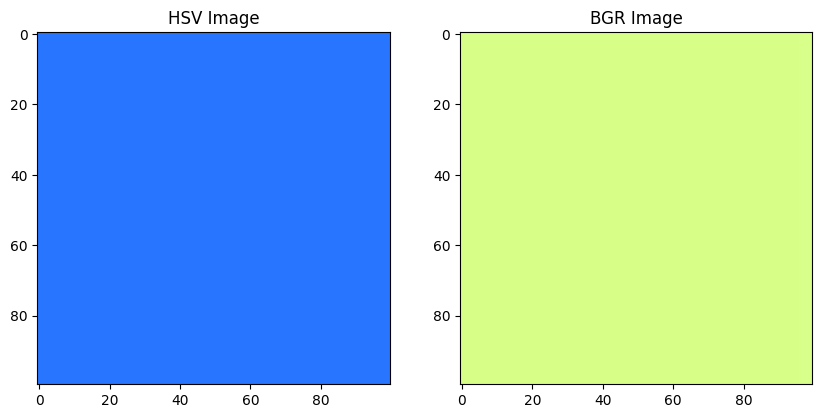

In [16]:
## SHOW HSV COLORS

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the HSV color range
hue = 30        # Hue value (0-179)
saturation = 255 # Saturation value (0-255)
value = 255      # Value/brightness (0-255)

# Create an image with the specified HSV color
hsv_image = np.zeros((100, 100, 3), dtype=np.uint8)
hsv_image[:] =  (40,118,255)
# (40,150,150)

# Convert HSV to BGR
bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the HSV and BGR images
plt.figure(figsize=(10, 5))

# Show the HSV image
plt.subplot(1, 2, 1)
plt.imshow(hsv_image, cmap='hsv')
plt.title('HSV Image')

# Show the BGR image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('BGR Image')

plt.show()


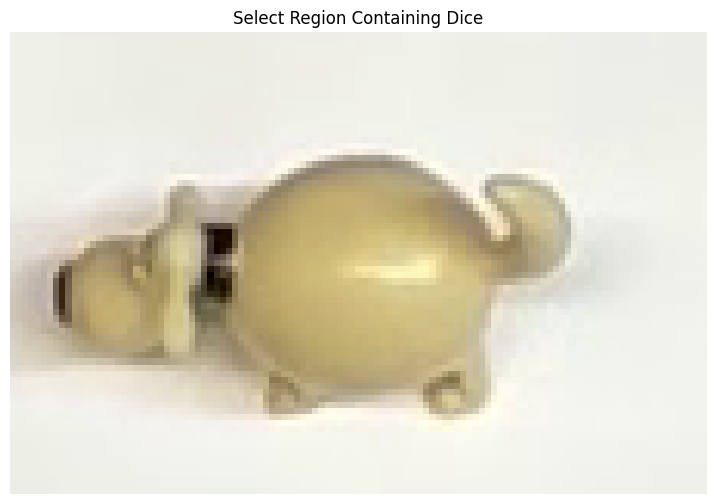

Darkest HSV Value: Hue=16.00, Saturation=55.00, Value=148.00
Lightest HSV Value: Hue=27.00, Saturation=118.00, Value=255.00


In [10]:
# EXTRACT COLORS WITH ROI

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
dice_image_path = './materials/light_dog.png'  # Replace with the path to your dice image
image = cv2.imread(dice_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Show the image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Select Region Containing Dice')
plt.axis('off')
plt.show()

# Region selection (using a mouse click in an interactive window)
roi = cv2.selectROI("Select Dice Region", image, fromCenter=False, showCrosshair=True)
cv2.destroyAllWindows()

# Extract the region containing the dice
x, y, w, h = roi
dice_region = hsv[y:y+h, x:x+w]

# Flatten the region to get all pixels
pixels = dice_region.reshape(-1, 3)

# Get minimum and maximum HSV values
min_hsv = np.min(pixels, axis=0)
max_hsv = np.max(pixels, axis=0)

# Print the darkest and lightest HSV values
print(f"Darkest HSV Value: Hue={min_hsv[0]:.2f}, Saturation={min_hsv[1]:.2f}, Value={min_hsv[2]:.2f}")
print(f"Lightest HSV Value: Hue={max_hsv[0]:.2f}, Saturation={max_hsv[1]:.2f}, Value={max_hsv[2]:.2f}")


In [1]:
import cv2
import numpy as np

video_path = "./materials/uppig.mov"
# video_path = "./materials/some_clip.mp4"
game = cv2.VideoCapture(video_path)
if game.isOpened():
    print("Video loaded")

target_width, target_height = 1024, 768

original_width = int(game.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(game.get(cv2.CAP_PROP_FRAME_HEIGHT))
game_fps = game.get(cv2.CAP_PROP_FPS)

# Scaling factors for resizing
scale_x = target_width / original_width
scale_y = target_height / original_height

#My colors
orange_lower = np.array([4, 66, 114])  # Lower bound for orange
orange_upper = np.array([17, 252, 253])  # Upper bound for orange
blue_lower = np.array([90, 80, 100])    # Lower bound for light blue
blue_upper = np.array([120, 255, 255])   # Upper bound for light blue

#For output
output_path = "./output/track_1.avi"
output_video = cv2.VideoWriter(
    output_path,
    cv2.VideoWriter_fourcc(*"DIVX"),
    game_fps,
    (target_width, target_height),
)

wolf_template = cv2.imread('./materials/wolf_template.jpg', cv2.IMREAD_GRAYSCALE)   #close blue one
wolf_template = cv2.resize(wolf_template, (50,50))
template_height, template_width = wolf_template.shape
cv2.imshow("wolf", wolf_template)
# print(template_height, template_width)



trackers = []

def create_tracker(tracker_type="CSRT"):
    if tracker_type == "CSRT":
        return cv2.TrackerCSRT_create()
    elif tracker_type == "KCF":
        return cv2.TrackerKCF_create()
    return None

def draw_bbox_with_area(frame, bbox, text, color=(255, 255, 255)):
    """Draws a bounding box and displays its area."""
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, color, 2, 1)
    text_position = (p1[0], max(0, p1[1] - 10))
    cv2.putText(
        frame,
        f"{text}",
        text_position,
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        color,
        1,
        cv2.LINE_AA,
    )

def is_square(bbox, tolerance=0.2):
    x, y, w, h = bbox
    aspect_ratio = w / h if w > h else h / w
    return 1 - tolerance <= aspect_ratio <= 1 + tolerance

def is_overlap(bbox1, bbox2):
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2
    return not (x1 + w1 < x2 or x2 + w2 < x1 or y1 + h1 < y2 or y2 + h2 < y1)

def is_valid_color(frame, bbox, orange_lower, orange_upper, blue_lower, blue_upper, threshold=0.3):
    """ Checking if the dice has right color """
    x, y, w, h = bbox
    roi = frame[y:y+h, x:x+w]  # Extract ROI
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)  # Convert ROI to HSV
    orange_mask = cv2.inRange(hsv_roi, orange_lower, orange_upper)
    blue_mask = cv2.inRange(hsv_roi, blue_lower, blue_upper)
    orange_pixels = cv2.countNonZero(orange_mask)
    blue_pixels = cv2.countNonZero(blue_mask)
    total_pixels = w * h
    return (orange_pixels + blue_pixels) / total_pixels >= threshold

# def match_wolf_template(frame, template, bbox, search_area=50, method=cv2.TM_CCOEFF_NORMED, threshold=0.3, angle_step=5, max_angle=360):
#     x, y, w, h = bbox  # Bounding box coordinates
#     best_match = None
#     max_val = threshold  # Initialize max_val to be below threshold

#     padded_template = cv2.copyMakeBorder(
#         template, 
#         template_height, template_height, template_width, template_width, 
#         cv2.BORDER_CONSTANT, value=0
#     )
#     padded_width, padded_height = padded_template.shape[::-1]

#     for angle in range(0, max_angle, angle_step):
#         # Rotate template
#         M = cv2.getRotationMatrix2D((padded_width / 2, padded_height / 2), angle, 1)
#         rotated_template = cv2.warpAffine(padded_template, M, (padded_width, padded_height), flags=cv2.INTER_LINEAR)
        
#         # Define search region
#         search_region = frame[max(0, y - search_area):min(frame.shape[0], y + h + search_area),
#                               max(0, x - search_area):min(frame.shape[1], x + w + search_area)]
#         if search_region.size == 0:
#             continue  # Skip invalid regions

#         gray_frame = cv2.cvtColor(search_region, cv2.COLOR_BGR2GRAY)
        
#         # Apply template matching
#         result = cv2.matchTemplate(gray_frame, rotated_template, method)
#         _, local_max_val, _, local_max_loc = cv2.minMaxLoc(result)
        
#         # Update best match
#         if local_max_val > max_val:
#             max_val = local_max_val
#             global_x = max(0, x - search_area) + local_max_loc[0]
#             global_y = max(0, y - search_area) + local_max_loc[1]
#             best_match = (global_x, global_y, template_width, template_height, max_val)

#     return best_match if best_match and max_val >= threshold else None

# def detect_template_with_orb(frame, template, min_matches=10, match_threshold=0.5):
#     """
#     Detect a template in the given frame using ORB feature matching.
    
#     Parameters:
#     - frame: Current video frame.
#     - template: Template image to detect.
#     - min_matches: Minimum number of good matches required for detection.
#     - match_threshold: Ratio threshold for Lowe's test.

#     Returns:
#     - bbox: Bounding box of the detected template (x, y, w, h) or None if not found.
#     """
#     # Convert to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Initialize ORB detector
#     orb = cv2.ORB_create()

#     # Detect keypoints and descriptors
#     keypoints1, descriptors1 = orb.detectAndCompute(template, None)
#     keypoints2, descriptors2 = orb.detectAndCompute(gray_frame, None)

#     # Create a BFMatcher and match descriptors
#     bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
#     matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#     # Apply Lowe's ratio test
#     good_matches = []
#     for m, n in matches:
#         if m.distance < match_threshold * n.distance:
#             good_matches.append(m)

#     if len(good_matches) >= min_matches:
#         # Extract matching keypoints
#         src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
#         dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#         # Compute homography
#         M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
#         if M is not None:
#             # Get template dimensions
#             h, w = template.shape[:2]
#             template_corners = np.float32([[0, 0], [w, 0], [w, h], [0, h]]).reshape(-1, 1, 2)

#             # Project corners onto the frame
#             projected_corners = cv2.perspectiveTransform(template_corners, M)

#             # Draw the bounding box
#             projected_corners = projected_corners.astype(int)
#             x, y, w, h = cv2.boundingRect(projected_corners)
#             return (x, y, w, h)
    
#     return None



# Start tracking
while game.isOpened():
    ret, frame = game.read()
    if not ret:
        break

    # Resize the frame
    frame = cv2.resize(frame, (target_width, target_height))
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create masks for orange and blue dice
    orange_mask = cv2.inRange(hsv_frame, orange_lower, orange_upper)
    blue_mask = cv2.inRange(hsv_frame, blue_lower, blue_upper)
    combined_mask = cv2.bitwise_or(orange_mask, blue_mask)

    # Find contours
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    detected_bboxes = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if 1000 < area < 4500:  # Area thresholds
            x, y, w, h = cv2.boundingRect(contour)
            if is_square((x, y, w, h)):
                detected_bboxes.append((x, y, w, h, area))
        
    # Check for new dice to track
    for bbox_data in detected_bboxes:
        bbox = bbox_data[:4]
        area = bbox_data[4]
        is_new = True
        for tracker, tracked_bbox in trackers:
            if is_overlap(bbox, tracked_bbox):
                is_new = False
                break

        if is_new and is_valid_color(frame, bbox, orange_lower, orange_upper, blue_lower, blue_upper):
            tracker = create_tracker("KCF")
            tracker.init(frame, bbox)
            trackers.append((tracker, bbox))
            print(f"New dice detected and tracking initialized at {bbox}")

    # Update trackers
    for i, (tracker, _) in enumerate(trackers):
        ok, bbox = tracker.update(frame)
        if ok:
            if is_valid_color(frame, bbox, orange_lower, orange_upper, blue_lower, blue_upper):
                trackers[i] = (tracker, bbox)
                area = bbox[2] * bbox[3]
                draw_bbox_with_area(frame, bbox, "Dice",(0, 255, 0))
                
            else: 
                print(f"Tracker {i} lost valid target at {bbox}")
                trackers[i] = None
        else:
            # print(f"Tracker {i} failed at {bbox}")
            trackers[i] = None

    # Remove invalid trackers
    trackers = [t for t in trackers if t is not None]

    # Save frame to output video
    output_video.write(frame)
    cv2.imshow("Dice Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

game.release()
output_video.release()
cv2.destroyAllWindows()


Video loaded
New dice detected and tracking initialized at (934, 675, 90, 75)
New dice detected and tracking initialized at (974, 655, 50, 54)
New dice detected and tracking initialized at (872, 614, 71, 66)
New dice detected and tracking initialized at (759, 580, 68, 62)
New dice detected and tracking initialized at (730, 555, 67, 61)
New dice detected and tracking initialized at (827, 542, 77, 66)
New dice detected and tracking initialized at (699, 514, 64, 59)
New dice detected and tracking initialized at (833, 517, 76, 67)
New dice detected and tracking initialized at (667, 471, 66, 59)
New dice detected and tracking initialized at (655, 424, 68, 68)
New dice detected and tracking initialized at (620, 406, 68, 67)
New dice detected and tracking initialized at (581, 431, 71, 65)
New dice detected and tracking initialized at (953, 455, 52, 52)
New dice detected and tracking initialized at (656, 392, 50, 59)
New dice detected and tracking initialized at (572, 451, 57, 49)
New dice det

In [5]:
import cv2
import numpy as np

# Function to detect and draw squares
def detect_and_draw_square(video_path, output_path, min_side_length=50, max_side_length=500):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Cannot open video file.")
        return
    
    # Get the video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Define the codec and create VideoWriter object
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), fps, (target_width, target_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize the frame
        resized_frame = cv2.resize(frame, (target_width, target_height))
        
        # Convert the frame to grayscale
        gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
        
        # Blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        
        # Use Canny edge detection
        edges = cv2.Canny(blurred, 50, 150)
        
        # Find contours
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # Approximate the contour to a polygon
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
            
            # Filter out the square shape
            if len(approx) == 4:  # Approximation with 4 vertices
                # Filter based on side length ratio
                side1 = np.linalg.norm(approx[0] - approx[1])
                side2 = np.linalg.norm(approx[1] - approx[2])
                side3 = np.linalg.norm(approx[2] - approx[3])
                side4 = np.linalg.norm(approx[3] - approx[0])
                avg_side_length = (side1 + side2 + side3 + side4) / 4
                
                if min_side_length <= avg_side_length <= max_side_length:
                    cv2.drawContours(resized_frame, [approx], 0, (0, 255, 0), 3)
        
        # Display the frame
        cv2.imshow('Processed Video', resized_frame)
        
        out.write(resized_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Video processing completed. Output saved to:", output_path)

# Define input and output parameters
video_path = "./materials/lik.mov"
target_width, target_height = 1024, 768

game = cv2.VideoCapture(video_path)
if game.isOpened():
    print("Video loaded")

original_width = int(game.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(game.get(cv2.CAP_PROP_FRAME_HEIGHT))
game_fps = game.get(cv2.CAP_PROP_FPS)

output_path = "./output/track_1.avi"

# Call the function
detect_and_draw_square(video_path, output_path)


Video loaded
Video processing completed. Output saved to: ./output/track_1.avi
